In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)), X] #X with bias

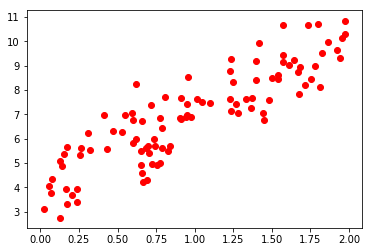

In [67]:
plt.scatter(X, y, color='red')
plt.show()

La regresión lineal permite encontrar un valor $a$ y un valor $b$ tal que la linea que define la siguiente ecuación, minimiza la distancia de todos los datos respecto a la misma.

<center><font size=5>$y = ax+b$</font></center>

La solución exacta o ecuación normal de la regresión lineal es la siguiente:

<center><font size=5>$\theta = [bias, a] = (X^T \cdot X)^{-1} \cdot X^T \cdot y $</font></center>

Es decir, encontrando $r$ encontramos los valores de $a$ y $b$ que resuelven el problema de ajuste lineal.

In [70]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [71]:
print theta

[[3.99454982]
 [3.03805019]]


In [108]:
x = np.array([[0], [2]])
y_solution = theta[1]*x + theta[0]


###En forma vectorizada
#x = np.array([[0], [2]])
#x_b = np.c_[np.ones((2, 1)), x]
#y_solution = x_b.dot(theta)

print y_solution

[[ 3.99454982]
 [10.0706502 ]]


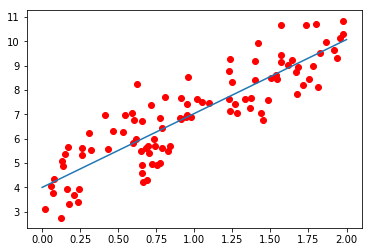

In [109]:
plt.scatter(X, y, color='red')
plt.plot(x, y_solution)
plt.show()

<hr>
<h2> Implementemos el ejemplo anterior mediante descenso del gradiente </h2>

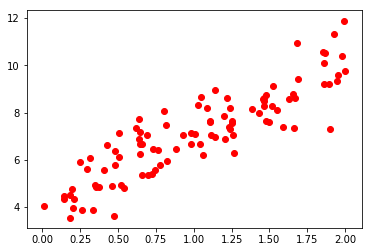

In [227]:
X = 2 * np.random.rand(100,1)
Y = 4 + 3*X + np.random.randn(100,1)

plt.scatter(X, Y, color='red')
plt.show()

In [228]:
def mse(a, y):
    return np.mean(np.sum(a - y)**2)

In [229]:
X = X.T
Y = Y.T

print X.shape

(1, 100)


In [230]:
W = np.random.random([1, np.shape(X)[0]])
b = np.array([[0]])

error:  484855.21113019297
error:  7487.530799212131
error:  362.95767233953234
error:  110.1058167212908
error:  71.87182936315526
error:  53.458184359564584
error:  40.44539772375792
error:  30.665491964653313
error:  23.256588230313348
error:  17.63828696373438


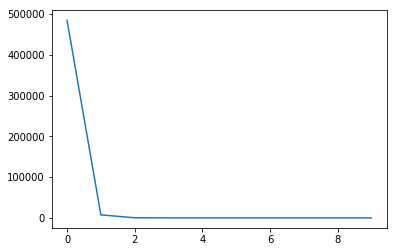

In [231]:
alpha = 0.01
epochs = 1000

m = X.shape[1]

cost_list = []

for i in range(epochs):
    A = W.T.dot(X) + b
    
    dz = A - Y
    dW = np.dot(X, dz.T) / m 
    db = np.sum(dz) / m
    
    W = W - alpha * dW
    b = b - alpha * db
    
    if(i % 100 == 0):
        cost = mse(A, Y)
        print "error: ", cost
        cost_list.append(cost)

plt.plot(cost_list)
plt.show()

In [232]:
print W,b

[[3.1457802]] [[3.8915016]]


[[ 3.8915016  10.18306199]]


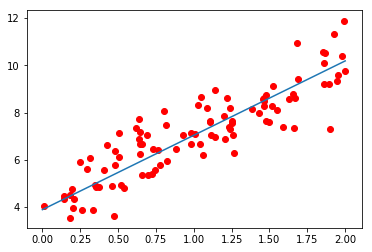

In [233]:
x = np.array([[0, 2]])
y_solution = W.T.dot(x) + b

print y_solution

plt.scatter(X.T, Y.T, color='red')
plt.plot(x.T, y_solution.T)
plt.show()